## Preparing data set for DNN

MFCCs

In [156]:
DATASET_FOLDER = '../dataset/data_restaurant'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=True)
shape = ds.shape
class_labels = ds.class_labels
shape

(64, 15)

((1260, 960), (540, 960))

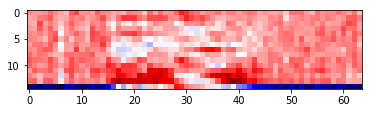

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### DNN model

In [158]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(128, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 128)               123008    
_________________________________________________________________
dropout_58 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_59 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 18)                2322      
Total params: 141,842
Trainable params: 141,842
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

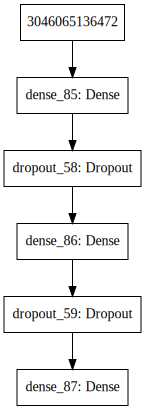

In [160]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training DNN

In [161]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1260 samples, validate on 540 samples
Epoch 1/50
1260/1260 [==============================] - 3s 2ms/step - loss: 2.4127 - acc: 0.2968 - val_loss: 1.2544 - val_acc: 0.7370
Epoch 2/50
1260/1260 [==============================] - 0s 238us/step - loss: 1.1209 - acc: 0.6468 - val_loss: 0.5786 - val_acc: 0.8574
Epoch 3/50
1260/1260 [==============================] - 0s 152us/step - loss: 0.6544 - acc: 0.8008 - val_loss: 0.3410 - val_acc: 0.9278
Epoch 4/50
1260/1260 [==============================] - 0s 308us/step - loss: 0.3998 - acc: 0.8841 - val_loss: 0.2661 - val_acc: 0.9278
Epoch 5/50
1260/1260 [==============================] - 0s 229us/step - loss: 0.2579 - acc: 0.9222 - val_loss: 0.2052 - val_acc: 0.9481
Epoch 6/50
1260/1260 [==============================] - 0s 134us/step - loss: 0.1968 - acc: 0.9429 - val_loss: 0.1573 - val_acc: 0.9574
Epoch 7/50
1260/1260 [==============================] - 0s 138us/step - loss: 0.1292 - acc: 0.9627 - val_loss: 0.1505 - val_acc: 0.9556
Epo

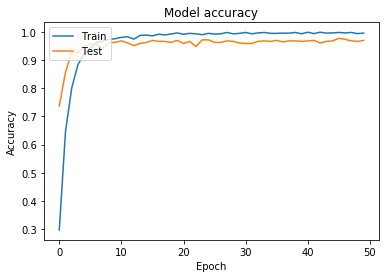

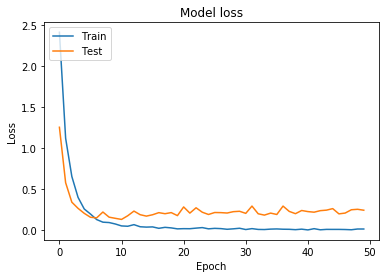

In [162]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [163]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/dnn_for_aed_restaurant{}.h5'.format(dt)
model.save(filename)

## Load the model

In [164]:
del model
model = models.load_model(filename)

## Confirmation

In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [167]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [168]:
class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [169]:
(activations[-1][:10]*100).astype(int)

array([[  0,   6,   0,   0,  92,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0,
          0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,

In [170]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])